In [1]:
import os
import numpy
from tensorflow import keras
import librosa
from matplotlib import pyplot

2023-07-15 19:27:55.714596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 19:28:16.863501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  mfcc = numpy.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

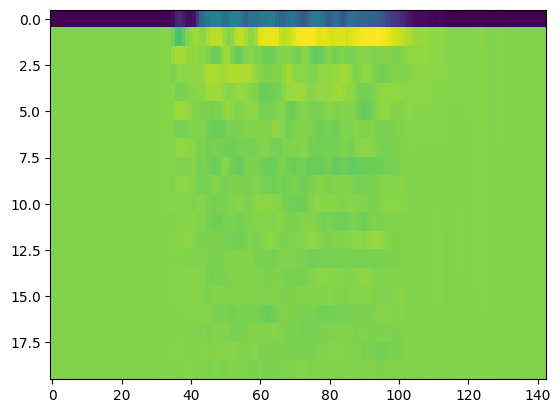

In [3]:
example_file = "/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/Actor_01/03-01-01-01-01-01-01.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [52]:
fn = []
for dirname, _, filenames in os.walk('/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))

In [53]:
len(fn) 

1440

In [13]:
fn[2878]

'/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/audio_speech_actors_01-24/Actor_24/03-01-05-01-01-02-24.wav'

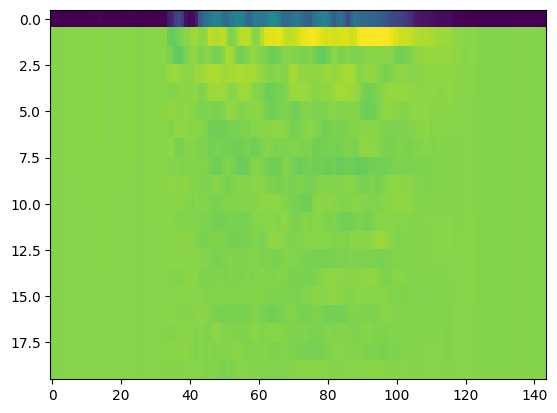

In [14]:
mfcc = get_mfcc(fn[1])
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

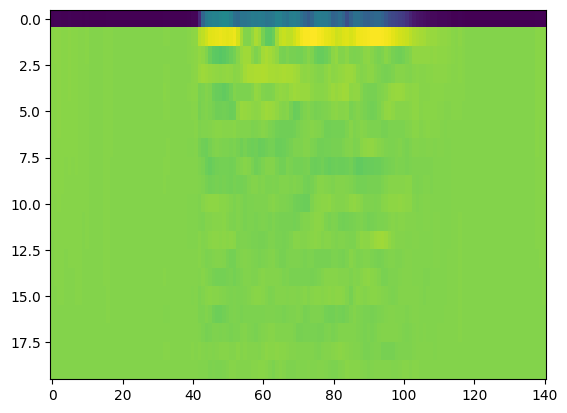

In [15]:
mfcc = get_mfcc(fn[2])
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

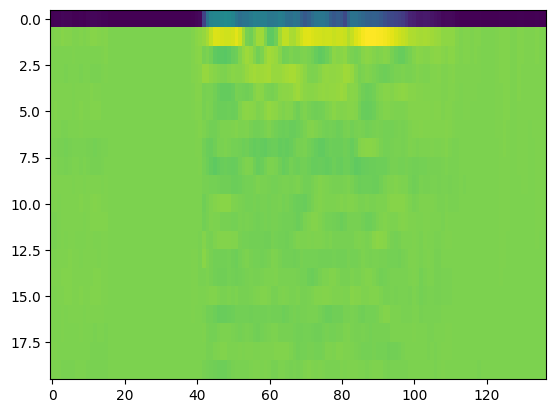

In [16]:
mfcc = get_mfcc(fn[3])
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [17]:
def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  melspectrogram = numpy.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

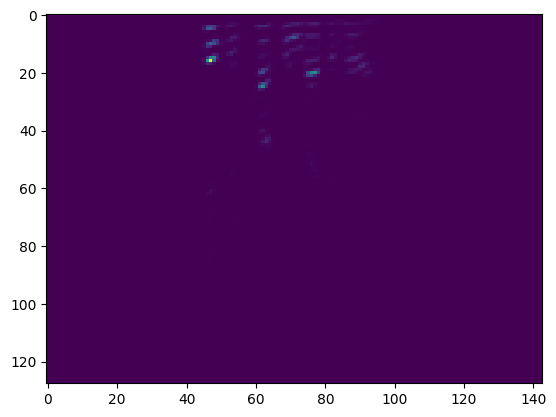

In [18]:
melspectrogram = get_melspectrogram(fn[0])
pyplot.imshow(melspectrogram, interpolation='nearest', aspect='auto')
pyplot.show()

In [19]:
def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = numpy.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

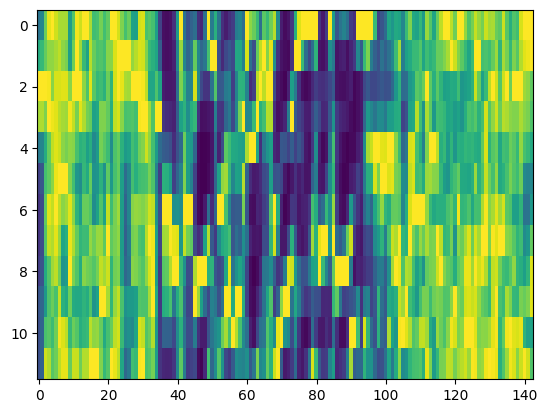

In [20]:
chroma = get_chroma_vector(fn[0])
pyplot.imshow(chroma, interpolation='nearest', aspect='auto')
pyplot.show()

In [21]:
def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = numpy.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

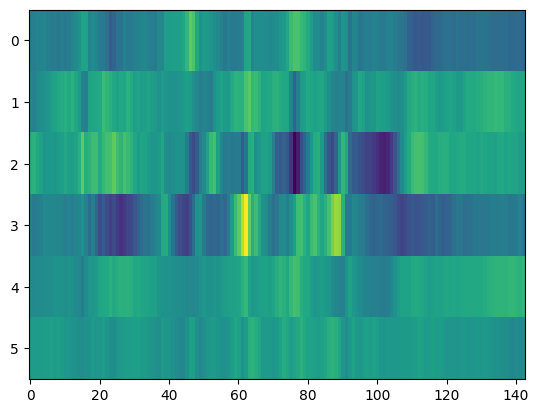

In [22]:
tntz = get_tonnetz(fn[0])
pyplot.imshow(tntz , interpolation='nearest', aspect='auto')
pyplot.show()

In [23]:
def get_feature(file_path):
  # Extracting MFCC feature
  mfcc = get_mfcc(file_path)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = numpy.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # Extracting Mel Spectrogram feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = numpy.concatenate( (melspectrogram_mean, 
                                               melspectrogram_min, 
                                               melspectrogram_max) )

  # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)
  chroma_min = chroma.min(axis=1)
  chroma_max = chroma.max(axis=1)
  chroma_feature = numpy.concatenate( (chroma_mean, chroma_min, chroma_max) )

  # Extracting tonnetz feature
  tntz = get_tonnetz(file_path)
  tntz_mean = tntz.mean(axis=1)
  tntz_min = tntz.min(axis=1)
  tntz_max = tntz.max(axis=1)
  tntz_feature = numpy.concatenate( (tntz_mean, tntz_min, tntz_max) ) 
  
  feature = numpy.concatenate( (chroma_feature, melspectrogram_feature, 
                                mfcc_feature, tntz_feature) )
  return feature

In [26]:
len(get_feature(fn[0]))

498

In [29]:
fn[400]

'/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/Actor_07/03-01-06-02-02-01-07.wav'

In [31]:
fn[400][-len('03-01-06-02-02-01-07.wav'):]

'03-01-06-02-02-01-07.wav'

In [36]:
fn[400][-len('03-01-06-02-02-01-07.wav'):][6:8]  # Emotion

'06'

In [37]:
fn[402][-len('03-01-06-02-02-01-07.wav'):][18:20]  # Gender

'07'

In [47]:
def get_metadata(file_name):
    if file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '01':
        emo = 'neutral'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '02':
        emo = 'calm'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '03':
        emo = 'happy'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '04':
        emo = 'sad'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '05':
        emo = 'angry'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '06':
        emo = 'fearful'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '07':
        emo = 'disgust'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '08':
        emo = 'surprised'
        
    if int(file_name[-len('03-01-06-02-02-01-07.wav'):][18:20]) % 2 == 0:  # Gender
        gen = 'female'
    else:
        gen = 'male'
        # 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 
        # 05 = angry, 06 = fearful, 07 = disgust, 
        # 08 = surprised
    return emo, gen

In [51]:
get_metadata(fn[200])

('sad', 'female')

In [49]:
get_metadata('03-01-06-02-02-01-06.wav')

('fearful', 'female')

In [54]:
get_metadata('03-01-06-02-02-01-06.wav')[0]

'fearful'

In [46]:
int(fn[402][-len('03-01-06-02-02-01-06.wav'):][18:20]) 

7

In [ ]:
male_features = []
female_features = []
male_labels = []
female_labels = []

from tqdm import tqdm
for i in tqdm(range(10000)):

for curr_file in fn:
    curr_feat = get_feature(curr_file)
    curr_meta = get_metadata(curr_file)
    if curr_meta[1] == 'male':
        male_features.append(curr_feat)
        male_labels.append(curr_meta[0])
    else:
        female_features.append(curr_feat)
        female_labels.append(curr_meta[0])

In [56]:
# from tqdm import tqdm


In [58]:
# from tqdm import tqdm

# # Initialize empty lists
# male_features = []
# male_labels = []
# female_features = []
# female_labels = []

# # Use tqdm to track progress
# for curr_file in tqdm(fn, desc="Processing files", 
#                       unit="file"):
#     curr_feat = get_feature(curr_file)
#     curr_meta = get_metadata(curr_file)
#     if curr_meta[1] == 'male':
#         male_features.append(curr_feat)
#         male_labels.append(curr_meta[0])
#     else:
#         female_features.append(curr_feat)
#         female_labels.append(curr_meta[0])

Processing files:  50%|███████████████▋               | 727/1440 [04:30<04:31,  2.62file/s]/mount/Project/Project Files/PythonEnvs/DataSciEnv2/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=1012
  warnings.warn(
Processing files: 100%|██████████████████████████████| 1440/1440 [09:11<00:00,  2.61file/s]


In [59]:
# import pickle

# with open('male_features.pkl', 'wb') as f:
#     pickle.dump(male_features, f)
    
# with open('female_features.pkl', 'wb') as f:
#     pickle.dump(female_features, f)
    
# with open('male_labels.pkl', 'wb') as f:
#     pickle.dump(male_labels, f)
    
# with open('female_labels.pkl', 'wb') as f:
#     pickle.dump(female_labels, f)    

In [63]:
import pickle

with open('male_labels.pkl', 'rb') as f:
    male_labels = pickle.load(f)

In [66]:
len(male_labels)

720

In [70]:
set(male_labels)

{'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'}

In [72]:
len(male_features[1])

498

In [ ]:
# permutations = numpy.random.permutation(42)
# male_features = numpy.array(male_features)[permutations]
# male_labels = numpy.array(male_labels)[permutations]

# male_features_train = male_features[0:180]
# male_labels_train = male_labels[0:180]

# features_val = features[180:240]
# labels_val = labels[180:240]

# features_test = features[240:300]
# labels_test = labels[240:300]

In [73]:
from sklearn.model_selection import train_test_split

male_features_train, male_features_test, male_labels_train, male_labels_test = train_test_split(
    male_features, male_labels, test_size=0.33, random_state=42)

In [75]:
male_labels_train[:5]

['angry', 'surprised', 'sad', 'fearful', 'calm']

In [80]:
import numpy as np

# Convert them to numpy arrays
male_features_train = np.array(male_features_train)
male_labels_train = np.array(male_labels_train)
male_features_test = np.array(male_features_test)
male_labels_test = np.array(male_labels_test)

In [82]:
male_labels_test[0]

'fearful'

In [100]:
# Define the list of possible values
possible_values = list(set(male_labels_train))

# Your list of strings to be encoded
# input_strings = ['happy', 'sad', 'angry', 'calm']

# Create a mapping from each value to its index
value_to_index = {value: index for index, value in enumerate(possible_values)}

# Map each string to its corresponding index
encoded_indices = [value_to_index[string] for string in male_labels_train]

# Perform one-hot encoding
one_hot_matrix = tf.one_hot(indices=encoded_indices, depth=len(possible_values))

# Convert the TensorFlow tensor to a NumPy array (optional)
male_labels_train_en = one_hot_matrix.numpy()



# Define the list of possible values
possible_values = list(set(male_labels_train))

# Your list of strings to be encoded
# input_strings = ['happy', 'sad', 'angry', 'calm']

# Create a mapping from each value to its index
value_to_index = {value: index for index, value in enumerate(possible_values)}

# Map each string to its corresponding index
encoded_indices = [value_to_index[string] for string in male_labels_test]

# Perform one-hot encoding
one_hot_matrix = tf.one_hot(indices=encoded_indices, depth=len(possible_values))

# Convert the TensorFlow tensor to a NumPy array (optional)
male_labels_test_en = one_hot_matrix.numpy()

In [107]:
len(male_features_train[0])

498

In [109]:
male_labels_train_en[0]

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [110]:
male_labels_train_en.shape

(482, 8)

In [141]:
inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.RMSprop(),
    # Loss function to minimize
    loss=tf.keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',  # Metric to monitor for early stopping
    patience=3,              # Number of epochs with no improvement before stopping
    mode='max',             # 'auto', 'min', 'max'. In this case, 'max' to maximize validation accuracy.
    verbose=1                # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
)

# Now you can use male_features_train_onehot and male_features_test_onehot for model training
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=0,
          validation_data=(male_features_test, male_labels_test_en),
          epochs=300,
         callbacks=[early_stopping_callback]
         )

Epoch 8: early stopping


In [142]:
score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 16.38655513525009%


In [129]:
import sys

class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']

    def on_epoch_end(self, epoch, logs=None):
        epoch += 1
        progress = (epoch / self.epochs) * 100
        sys.stdout.write(f"\rEpoch {epoch}/{self.epochs} - {progress:.2f}% - loss: {logs['loss']:.4f} - categorical_accuracy: {logs['categorical_accuracy']:.4f} - val_loss: {logs['val_loss']:.4f} - val_categorical_accuracy: {logs['val_categorical_accuracy']:.4f}")
        sys.stdout.flush()
        
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=0,
          validation_data=(male_features_test, male_labels_test_en),
          epochs=64,
          callbacks=[early_stopping_callback, CustomCallback()]
)

Epoch 16/64 - 25.00% - loss: 1.1891 - categorical_accuracy: 0.6598 - val_loss: 3.7724 - val_categorical_accuracy: 0.4832Epoch 16: early stopping


In [97]:
# # Define the list of possible values
# possible_values = list(set(male_labels_train))

# # Your list of strings to be encoded
# # input_strings = ['happy', 'sad', 'angry', 'calm']

# # Create a mapping from each value to its index
# value_to_index = {value: index for index, value in enumerate(possible_values)}

# # Map each string to its corresponding index
# encoded_indices = [value_to_index[string] for string in male_labels_train]

# # Perform one-hot encoding
# one_hot_matrix = tf.one_hot(indices=encoded_indices, depth=len(possible_values))

# # Convert the TensorFlow tensor to a NumPy array (optional)
# male_labels_train_en = one_hot_matrix.numpy()

# # print(one_hot_array)

In [98]:
# male_labels_train_en[0]

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [99]:
# male_labels_train[0]

'angry'